<a href="https://colab.research.google.com/github/arkwith7/aSSIST_ML/blob/main/machine_learning_3_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matplotlib 버전 업그레이드, 한글 Font 설치

In [ ]:
# Step 1, Matplotlibs 업그레이드
!pip install matplotlib -U
!pip install seaborn -U
!pip install pandas -U

# Step 2, 한글 설치 및 사용 설정
!apt-get -qq install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Step 3, 셀 실행 후 런타임 재시작

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 43.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4
Selecting previously unselected package fonts-nanum.
(Reading database ... 128288 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fon

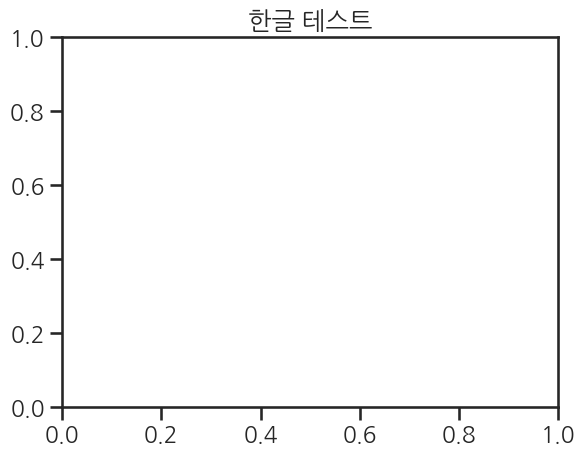

In [ ]:
# Step 4, seaborn 환경설정
import seaborn as sns

sns.set_style('ticks')
sns.set_palette('colorblind')
sns.set_context('talk')

# Step 5, 한글 글꼴 설정
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = ['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 한글 설정 확인
%matplotlib inline
plt.title('한글 테스트')
plt.show()

In [ ]:
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
# import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
# import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk

# matplotlib 설정
# mpl.use('Agg')

# seaborn 설정
# sns.set()
# sns.set_style("whitegrid")
# sns.set_color_codes()

# Clustering

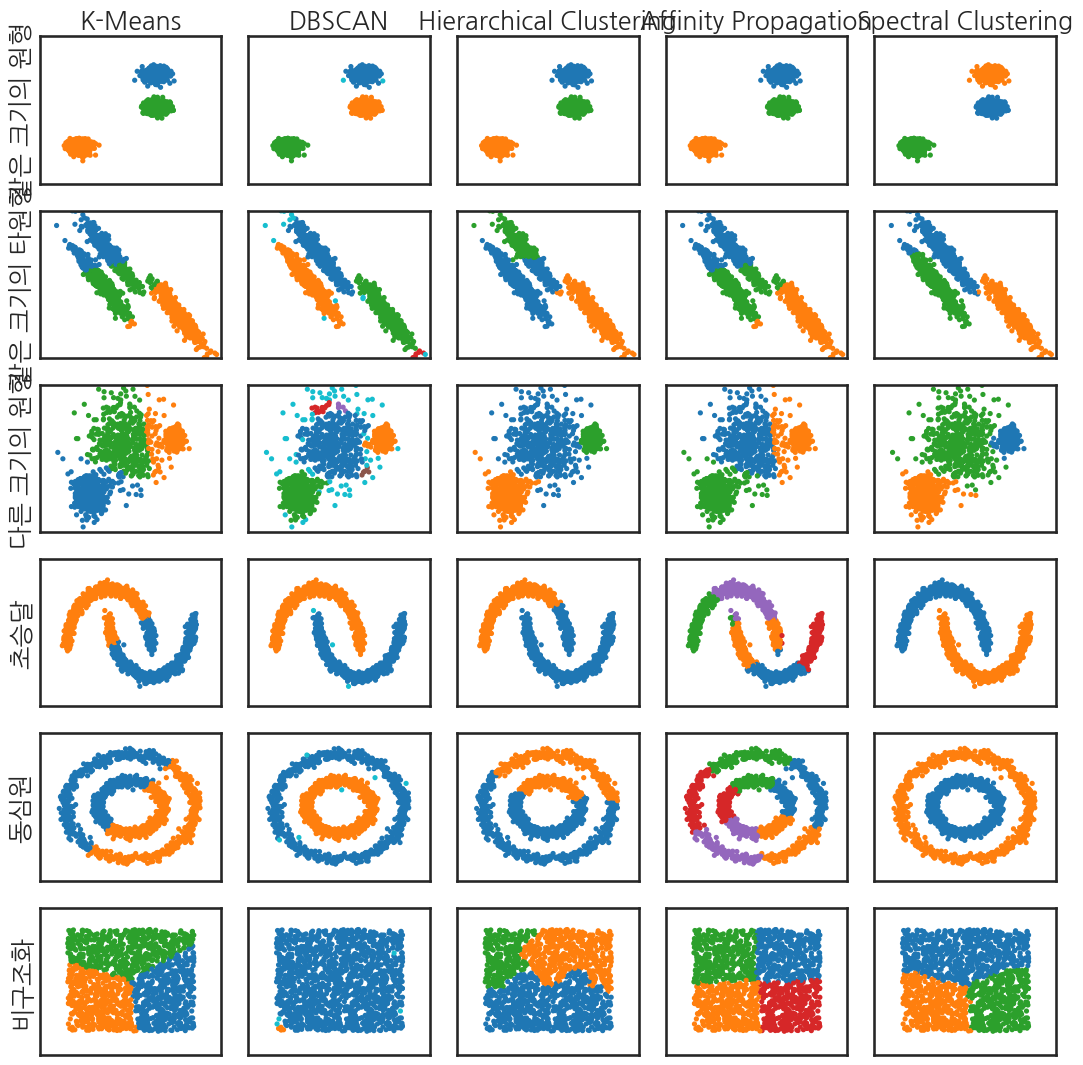

In [ ]:
from sklearn.datasets import *
from sklearn.cluster import *
from sklearn.preprocessing import StandardScaler
from sklearn.utils._testing import ignore_warnings

np.random.seed(0)
n_samples = 1500
blobs = make_blobs(n_samples=n_samples, random_state=8)
X, y = make_blobs(n_samples=n_samples, random_state=170)
anisotropic = (np.dot(X, [[0.6, -0.6], [-0.4, 0.8]]), y)
varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)
noisy_circles = make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
no_structure = np.random.rand(n_samples, 2), None
datasets = {
    "같은 크기의 원형": blobs, 
    "같은 크기의 타원형": anisotropic, 
    "다른 크기의 원형": varied, 
    "초승달": noisy_moons, 
    "동심원": noisy_circles, 
    "비구조화": no_structure
}

plt.figure(figsize=(11, 11))
plot_num = 1
for i, (data_name, (X, y)) in enumerate(datasets.items()):
    if data_name in ["초승달", "동심원"]:
        n_clusters = 2
    else:
        n_clusters = 3

    X = StandardScaler().fit_transform(X)

    two_means = MiniBatchKMeans(n_clusters=n_clusters)
    dbscan = DBSCAN(eps=0.15)
    spectral = SpectralClustering(n_clusters=n_clusters, affinity="nearest_neighbors")
    ward = AgglomerativeClustering(n_clusters=n_clusters)
    affinity_propagation = AffinityPropagation(damping=0.9, preference=-200)
    clustering_algorithms = (
        ('K-Means', two_means),
        ('DBSCAN', dbscan),
        ('Hierarchical Clustering', ward),
        ('Affinity Propagation', affinity_propagation),
        ('Spectral Clustering', spectral),
    )

    for j, (name, algorithm) in enumerate(clustering_algorithms):
        with ignore_warnings(category=UserWarning):
            algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i == 0:
            plt.title(name)
        if j == 0:
            plt.ylabel(data_name)
        colors = plt.cm.tab10(np.arange(20, dtype=int))
        plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.tight_layout()
plt.show()

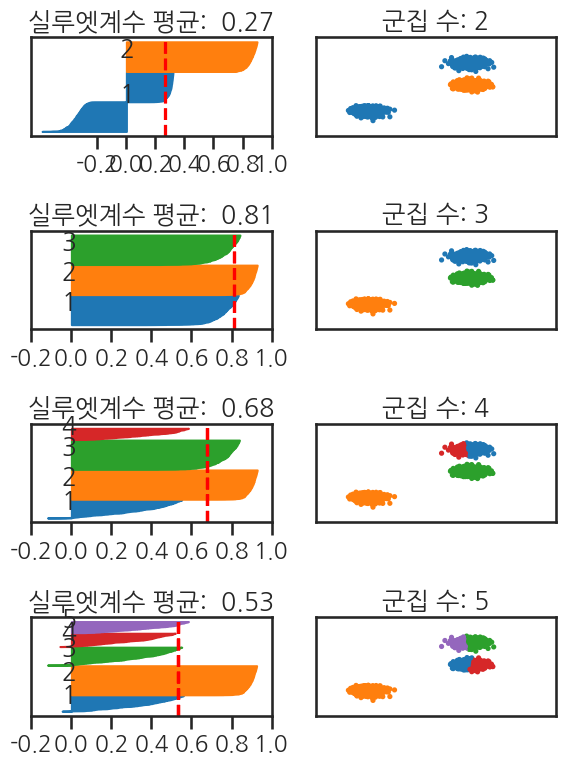

In [ ]:
from sklearn.metrics import silhouette_samples

def plot_silhouette(data):
    X = StandardScaler().fit_transform(data[0])
    colors = plt.cm.tab10(np.arange(20, dtype=int))
    plt.figure(figsize=(6, 8))
    for i in range(4):
        model = SpectralClustering(n_clusters=i + 2, affinity="nearest_neighbors")
        cluster_labels = model.fit_predict(X)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        silhouette_avg = sample_silhouette_values.mean()

        plt.subplot(4, 2, 2 * i + 1)
        y_lower = 10
        for j in range(i + 2):
            jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
            jth_cluster_silhouette_values.sort()
            size_cluster_j = jth_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_j
            plt.fill_betweenx(np.arange(y_lower, y_upper),
                              0, jth_cluster_silhouette_values,
                              facecolor=colors[j], edgecolor=colors[j])
            plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j + 1))
            plt.axvline(x=silhouette_avg, color="red", linestyle="--")
            plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.yticks([])
            plt.title("실루엣계수 평균: {:5.2f}".format(silhouette_avg))
            y_lower = y_upper + 10


        plt.subplot(4, 2, 2 * i + 2)
        plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[cluster_labels])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.title("군집 수: {}".format(i + 2))

    plt.tight_layout()
    plt.show()
    
plot_silhouette(blobs)

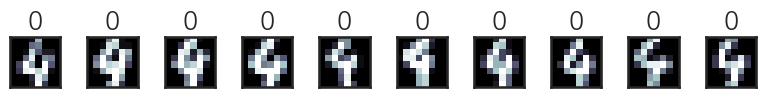

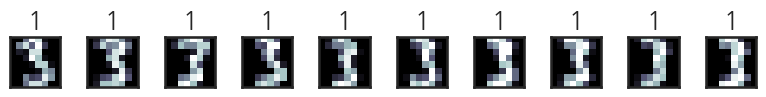

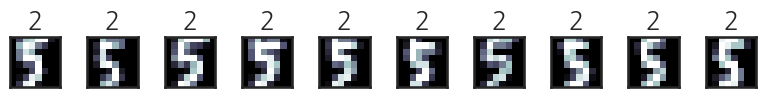

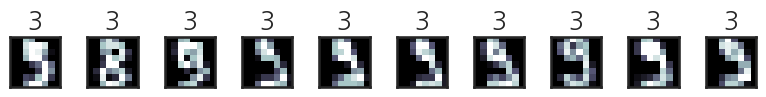

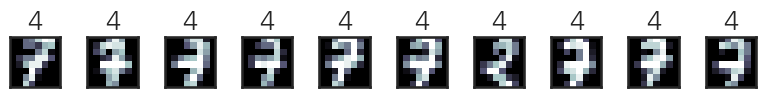

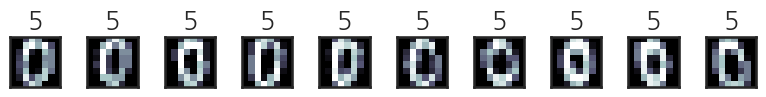

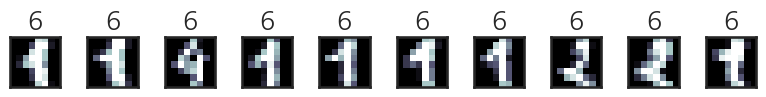

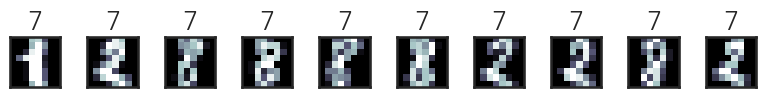

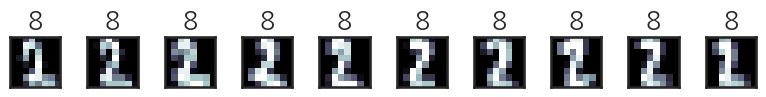

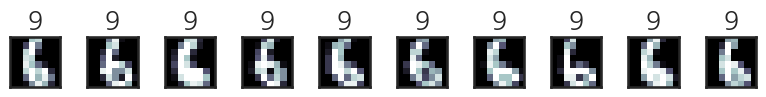

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
    

for i in range(10):
    show_cluster(digits.images, y_pred, i)

In [ ]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score
print("Silhouette Score:", silhouette_score(digits.data, y_pred))

Silhouette Score: 0.18251916424600556


## 연습문제

digits 문제를를 cluster 개수를를 6, 8, 10, 12, 14 로 바꿔가면서 실루엣 계수 평균 구해보기